# ARCH model 

* Dans le domaine des investissements financiers, la volatilité est une mesure 
statistique largement utilisée pour montrer la dispersion des rendements des actifs financiers dans le temps.

* En général, plus la volatilité est élevée, plus l'actif financier est risqué. 

* Ces informations sont utiles pour aider un investisseur ou un négociant à différencier un actif à faible risque d'un actif à risque élevé.





## Etape 1: Charger et inspecter les données

In [1]:
!pip install arch

     |████████████████████████████████| 795 kB 2.9 MB/s eta 0:00:01


In [2]:
#Import required libraries

import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from arch import arch_model

import ipdb;

<ipython-input-2-e87b6f926054>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [76]:
def get_data_arch(action):

    company_dict = {
        'asml' : 'ASML.AS',
        'lvmh': 'MC.PA',
        'sap' : 'SAP.DE',
        'linde' : 'LIN',
        'siemens' : 'SIE.DE',
        'total' : 'FP.PA',
        'sanofi' : 'SAN.PA',
        'allianz' : 'ALV.DE', 'loreal' : '',
        'schneider' : 'SU.PA',
        'iberdrola' : 'IBE.MC',
        'enel' : 'ENEL.MI',
        'air-liquide' : 'AI.PA',
        'basf' : 'BAS.DE',
        'bayer' : 'BAYN.DE',
        'adidas' : 'ADS.DE',
        'airbus' : 'AIR.PA',
        'adyen' : 'ADYEN.AS',
        'deutsche-telecom' : 'DTE.DE',
        'daimler' : 'DAI.DE',
        'bnp' : 'BNP.PA',
        'anheuser-busch' : 'ABI.BR',
        'vinci' : 'DG.PA',
        'prosus' : 'PRX.AS',
        'banco-santander' : 'SAN.MC',
        'philips' : 'PHIA.AS',
        'kering' : 'KER.PA',
        'deutsche-post' : 'DPW.DE',
        'axa' : 'CS.PA',
        'safran' : 'SAF.PA',
        'danone'  : 'BN.PA',
        'essilor' : 'EL.PA',
        'intensa' : 'ISP.MI',
        'munchener' : 'MUV2.DE',
        'pernod' : 'RI.PA',
        'vonovia' : 'VNA.DE',
        'vw' : 'VOW3.DE',
        'ing' : 'INGA.AS',
        'crh' : 'CRG.IR',
        'industria-diseno' : 'ITX.MC',
        'kone' : 'KNEBV.HE',
        'deutsche-borse' : 'DB1.DE',
        'ahold' : 'AHOG.DE',
        'flutter' : 'FLTR.IR',
        'amadeus' : 'AMS.MC',
        'engie' : 'ENGI.PA',
        'bmw' : 'BMW.DE',
        'vivendi' : 'VIV.PA',
        'eni' : 'ENI.MI',
        'nokia' : 'NOKIA.HE'
    }
  

    path = f"/content/drive/MyDrive/Google_Colab_stock_prediction/raw_data/{company_dict[action]}.csv"
    df= pd.read_csv(path)
    # Création d'une liste vide pour contenir les valeurs de prédiction glissante. 
    rolling_predictions = []
    # Définissons la taille du test à 1 jours
    test_size = 252
    #Calculer le daily returns 
    df['Return'] = 100 * (df['Close'].pct_change())
    df.dropna(inplace=True)

    for i in range(test_size):
    train = df['Return'][:-(test_size-i)]
    #ipdb.set_trace()
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

    #df['arch_pred']= rolling_predictions
    #pred = rolling_predictions.to_frame('arch_pred')

    #Construct a Pandas series for the rolling_predictions.
    rolling_predictions = pd.Series(rolling_predictions, index=df['Return'].index[-test_size:])

    pred_df = rolling_predictions.to_frame('arch_pred')
    df = df.join(pred_df, how='outer')



    return df

#.join(pred, how='outer')

In [3]:
2.03 * math.sqrt(252)

32.22525096876671

In [78]:
safran_df = get_data_arch('safran')
safran_df

,Date,Open,High,Low,Close,Adj Close,Volume,Return,arch_pred
1,2016-06-08,61.220001,61.450001,60.910000,61.349998,58.069687,939431,-0.243906,NaN
2,2016-06-09,61.119999,61.230000,60.389999,61.000000,57.738400,860170,-0.570494,NaN
3,2016-06-10,60.830002,61.029999,60.169998,60.680000,57.435513,1385683,-0.524590,NaN
4,2016-06-13,59.570000,59.779999,58.619999,58.619999,55.485657,1634715,-3.394860,NaN
5,2016-06-14,57.810001,58.099998,57.020000,57.020000,53.971207,1381591,-2.729442,NaN
...,...,...,...,...,...,...,...,...,...
1274,2021-05-31,123.500000,123.800003,122.120003,122.360001,122.360001,397991,-1.417984,2.030831
1275,2021-06-01,123.220001,125.019997,122.300003,124.440002,124.440002,425900,1.699903,1.969716
1276,2021-06-02,124.500000,125.879997,123.760002,125.680000,125.680000,605769,0.996463,1.918087
1277,2021-06-03,125.940002,126.160004,123.739998,123.860001,123.860001,566820,-1.448121,1.809774


In [ ]:
#Chargeons maintenant les données de l'action Apple.
from google.colab import drive
drive.mount('/content/drive')

In [6]:
path = "/content/drive/MyDrive/Google_Colab_stock_prediction/raw_data/BN.PA.csv"
df= pd.read_csv(path)

In [7]:
#Calculer le daily returns 
df['Return'] = 100 * (df['Close'].pct_change())

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2016-06-07,63.000000,63.400002,62.840000,63.330002,52.699253,1012070,NaN
1,2016-06-08,63.090000,63.389999,62.950001,63.130001,52.532829,853089,-0.315808
2,2016-06-09,63.070000,63.169998,62.540001,62.790001,52.249901,768976,-0.538571
3,2016-06-10,62.689999,62.720001,61.320000,61.430000,51.118191,1390028,-2.165952
4,2016-06-13,60.799999,61.330002,60.470001,60.470001,50.319336,1314460,-1.562753


In [10]:
df.shape

(1279, 8)

* **REMARQUE :**

La méthode **pct_change** calcule automatiquement les variations en pourcentage du prix de clôture du jour en cours par rapport au jour précédent. Veuillez noter que les variations en pourcentage peuvent être positives ou négatives, selon le sens des variations de prix. Les changements de pourcentage résultants sont stockés dans la nouvelle colonne "Return" du dataframe.

* **Plotting daily returns :**

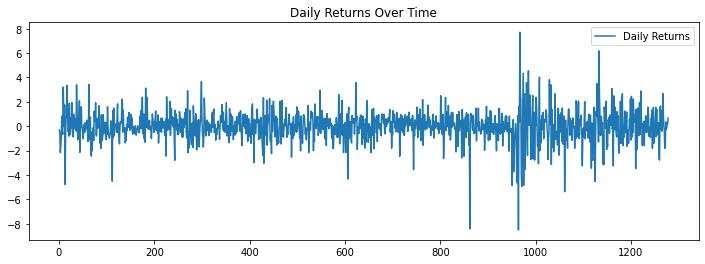

In [11]:
df.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(df['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')
plt.show()

* **Calculation of daily, monthly, and annual volatility**

1. Utilisez la méthode std pour calculer l'écart type des prix de retour quotidiens et les valeurs résultantes sont affectées à une variable daily_volatility et affichez la sortie en utilisant l'instruction print.

In [12]:
daily_volatility = df['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

Daily volatility:  1.27%


1. Nous supposons qu'il y a 21 jours de négociation par mois et donc la volatilité mensuelle est calculée en multipliant la racine carrée de 21 avec la volatilité quotidienne.

In [13]:
monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

Monthly volatility:  5.80%


1. Nous supposons qu'il y a 252 jours de négociation par mois et donc la volatilité annuelle est calculée en multipliant la racine carrée de 252 avec la volatilité quotidienne.

In [14]:
annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

Annual volatility:  20.08%


**REMARQUE :**

Nous pouvons constater que la volatilité annuelle de cette action (AAPL) est assez élevée. C'est la raison pour laquelle les investissements en actions sont toujours accompagnés de risques élevés et ne devraient jamais être négociés au hasard.

* Les détails de la volatilité ci-dessus nous donnent uniquement une volatilité moyenne par jour, par mois et par an. Elles peuvent être utiles pour comparer le niveau de risque général entre deux ou plusieurs actions. Cependant, la volatilité d'une action n'est pas une valeur constante tout au long de l'année. En réalité, la volatilité fluctue à un niveau différent chaque jour. Une journée avec une volatilité très élevée peut avoir un impact important sur la volatilité des jours suivants et cet impact s'estompera avec le temps.

## Etape 2: Train Test Split 

## Etape 3: Construire le modèle

* Dans cette section, nous allons construire un modèle GARCH (Generalized Auto Regressive Conditional Heteroskedasticity) pour prédire la volatilité des actions sur la base des cours de clôture historiques et de la volatilité. La logique mathématique du modèle GARCH peut sembler compliquée mais nous pouvons utiliser la bibliothèque Python arch pour encapsuler la complexité mathématique en quelques lignes de scripts seulement.



* Récupérez les  daily return data dans la fonction **arch_model**. 
Nous définissons p et q à 1 et laissons les paramètres de mean, vol et dist par défaut, qui sont 'constant', 'GARCH' et 'normal'.

In [15]:
garch_model = arch_model(df['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

In [16]:
#Fit the GARCH model and print out the results
gm_result = garch_model.fit(disp='off')
print(gm_result.params)

mu          0.022377
omega       0.055477
alpha[1]    0.056376
beta[1]     0.906536
Name: params, dtype: float64


**INTERPRETATION**

* Plus la valeur alpha résultante est grande, plus l'impact immédiat de la volatilité de l'action est important. 

* D'un autre côté, un bêta plus grand indique une durée plus longue de l'impact de la volatilité.

* Maintenant, nous allons utiliser la **forecast method** pour effectuer une prévision à 5 périodes **(horizon=1)**.

In [17]:
#print('\n')
gm_forecast = gm_result.forecast(horizon = 1)
print(gm_forecast.variance[-1:])

           h.1
1278  1.271692


* Le résultat de la prévision ci-dessus comprend la prévision à une étape en utilisant les données jusqu'au 1265 jours inclus inclus.

## Etape 3: Prévision roulante( Rolling forcast) en utilisant le modèle GARCH

* À ce stade, nous avons construit un modèle GARCH qui peut prévoir la volatilité des actions. 

* Maintenant, nous pouvons tester notre modèle à travers un processus de prédiction continue en utilisant les données historiques dans la période de temps n.

In [40]:
# Création d'une liste vide pour contenir les valeurs de prédiction glissante. 
rolling_predictions = []
# Définissons la taille du test à 1 jours
test_size = 252

Dans cette partie, nous créons un train set de manière répétée dans une boucle en utilisant les daily return values des actions à partir du premier jour jusqu'au jour **-( test_size-i)**. Cela signifie que dans la première boucle, les données du premier jour, du 5 janvier 2016 au 14 novembre 2019, seront ajustées au modèle GARCH. Dans la deuxième boucle, les données sont dérivées du 5 janvier 2016 au 15 novembre 2019 et ainsi de suite.



In [27]:
pip install ipdb

     |████████████████████████████████| 788kB 10.5MB/s 
     |████████████████████████████████| 368kB 22.4MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-cp37-none-any.whl size=11649 sha256=dc7617de12cad70c2581e506f57f7f290712a888386dfcc0bb61d942b045265c
  Stored in directory: /root/.cache/pip/wheels/fd/cd/67/bb18bf4caa63b6618f9ec64e8d1d8ba67edcf397cff328fbfb
Successfully built ipdb
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.24.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [41]:
import ipdb;

for i in range(test_size):
    train = df['Return'][:-(test_size-i)]
    #ipdb.set_trace()
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

* Dans chaque boucle, un modèle GARCH est train avec les paramètres p et q fixés à 1. Le modèle actuel est utilisé pour prévoir la volatilité avec un pas de temps (horizon=1).

* Puis la variance de la volatilité prédite est élevée au carré. La valeur finale (écart type) est ajoutée aux rolling_predictions.


In [37]:
len(rolling_predictions)

2538

In [50]:
pred = rolling_predictions.to_frame('arch_pred')


In [51]:
df.join(pred, how='outer')

,Date,Open,High,Low,Close,Adj Close,Volume,Return,arch_pred
1,2016-06-08,63.090000,63.389999,62.950001,63.130001,52.532829,853089,-0.315808,NaN
2,2016-06-09,63.070000,63.169998,62.540001,62.790001,52.249901,768976,-0.538571,NaN
3,2016-06-10,62.689999,62.720001,61.320000,61.430000,51.118191,1390028,-2.165952,NaN
4,2016-06-13,60.799999,61.330002,60.470001,60.470001,50.319336,1314460,-1.562753,NaN
5,2016-06-14,60.900002,61.290001,59.939999,60.000000,49.928238,2926789,-0.777247,NaN
...,...,...,...,...,...,...,...,...,...
1274,2021-05-31,58.459999,59.389999,58.240002,58.299999,58.299999,1091801,-0.273691,1.287190
1275,2021-06-01,58.230000,58.599998,57.950001,58.220001,58.220001,1017600,-0.137218,1.249586
1276,2021-06-02,58.139999,58.689999,58.020000,58.360001,58.360001,1051791,0.240467,1.213090
1277,2021-06-03,58.439999,58.610001,57.939999,58.470001,58.470001,915915,0.188485,1.179529


In [46]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Return
1,2016-06-08,63.090000,63.389999,62.950001,63.130001,52.532829,853089,-0.315808
2,2016-06-09,63.070000,63.169998,62.540001,62.790001,52.249901,768976,-0.538571
3,2016-06-10,62.689999,62.720001,61.320000,61.430000,51.118191,1390028,-2.165952
4,2016-06-13,60.799999,61.330002,60.470001,60.470001,50.319336,1314460,-1.562753
5,2016-06-14,60.900002,61.290001,59.939999,60.000000,49.928238,2926789,-0.777247
...,...,...,...,...,...,...,...,...
1274,2021-05-31,58.459999,59.389999,58.240002,58.299999,58.299999,1091801,-0.273691
1275,2021-06-01,58.230000,58.599998,57.950001,58.220001,58.220001,1017600,-0.137218
1276,2021-06-02,58.139999,58.689999,58.020000,58.360001,58.360001,1051791,0.240467
1277,2021-06-03,58.439999,58.610001,57.939999,58.470001,58.470001,915915,0.188485


In [42]:
#Construct a Pandas series for the rolling_predictions.
rolling_predictions = pd.Series(rolling_predictions, index=df['Return'].index[-test_size:])


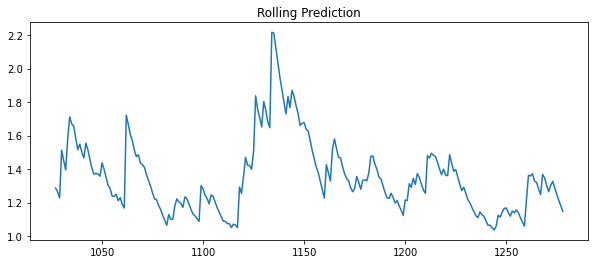

In [43]:
# Création un graphique pour afficher la prédiction continue de la volatilité sur les 365 derniers jours.
plt.figure(figsize=(10,4))
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')
plt.show()

Nous y sommes presque. Le graphique linéaire ci-dessus nous montre la prédiction continue de la volatilité au cours des 1279 derniers jours. Nous pouvons observer qu'une volatilité prédite très élevée a eu lieu autour de **...** .
Afin d'avoir une meilleure idée de la précision de notre modèle GARCH dans la prédiction de la volatilité, créons un autre sous-graphe dayly return. (valeurs réelles) et superposons-le au graphique linéaire de prédiction continue.

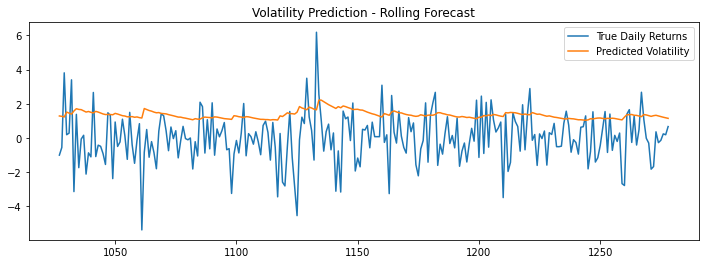

In [45]:
# Create a line plot to show the daily return only for the last 365 days (stock_data[‘Return’][-365:]).
plt.figure(figsize=(12,4))
plt.plot(df['Return'][-test_size:])

#Create another line plot for the rolling predicted volatility
plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])
plt.show()

À partir des sous-tracés ci-dessus, nous pouvons observer que notre volatilité prédite est généralement en ligne avec les rendements quotidiens (valeurs réelles). Cela signifie que notre modèle GARCH est performant ici. Dans la zone où la volatilité prédite est élevée (par exemple, mars-avril 2020), les rendements quotidiens sont également élevés. Nous pouvons voir que la volatilité prédite au début de 2021 est généralement moins fluctuante et qu'elle présente donc un risque relativement plus faible pendant cette période.


**CONCLUSION**
Nous avons suivi le processus de construction d'un modèle GARCH pour prédire la volatilité des actions. Vous pouvez essayer avec différents tickers et observer les résultats. Il est important de noter que la volatilité prédite ne fait que nous montrer la situation actuelle du marché pour nous aider dans notre plan d'investissement. En réalité, même une forte volatilité du marché peut également générer de grands profits lorsqu'elle est correctement exploitée. Une stratégie d'investissement supplémentaire basée sur l'analyse fondamentale et/ou l'analyse technique sera nécessaire pour consolider le plan d'investissement.